In [26]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from efficientnet_pytorch import EfficientNet

In [27]:
model = EfficientNet.from_name('efficientnet-b0')

In [28]:
path = './images/images/'
train_path = './images/images/train'
valid_path = './images/images/valid'
angry_file = './images/images/valid/angry/0'


In [4]:
data = ImageDataBunch.from_folder(path, size=224, bs=32).normalize(imagenet_stats)

In [5]:
data.c

7

In [6]:
model._fc = nn.Linear(1280, data.c)

In [7]:
learn = Learner(data, model, metrics= [accuracy], callbacks=[])

In [9]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (28821 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprise,surprise,surprise,surprise,surprise
Path: images/images;

Valid: LabelList (7066 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprise,surprise,surprise,surprise,surprise
Path: images/images;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (s

In [8]:
learn.lr_find(start_lr = 1e-8)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


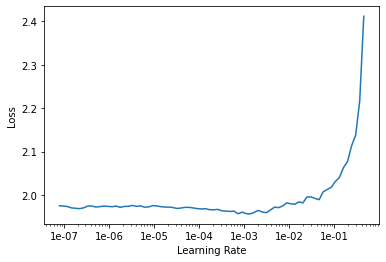

In [9]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.760182,13.675239,0.120860,02:36
1,1.520433,1.938003,0.319417,02:34
2,1.375675,1.383741,0.450892,02:34
3,1.259016,1.241614,0.512171,02:34


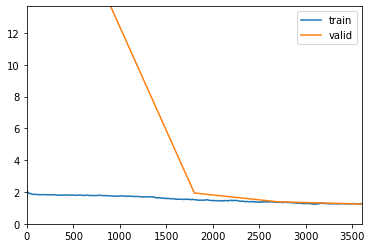

In [11]:
learn.fit_one_cycle(4, max_lr=slice(1e-2) ,callbacks=[CSVLogger(learn), ShowGraph(learn)])

epoch,train_loss,valid_loss,accuracy,time
0,1.361658,2.004805,0.416077,02:34
1,1.303391,1.535603,0.410841,02:34
2,1.162986,1.166336,0.548825,02:34
3,1.072902,1.108097,0.582932,02:34


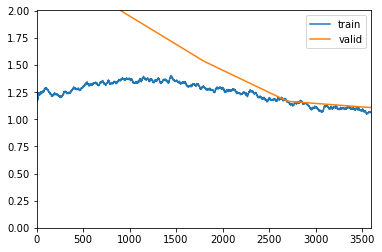

In [12]:
learn.fit_one_cycle(4, max_lr=slice(1e-2) ,callbacks=[CSVLogger(learn), ShowGraph(learn)])

In [14]:
learn.summary()

EfficientNet
Layer (type)         Output Shape         Param #    Trainable 
ZeroPad2d            [3, 225, 225]        0          False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         True      
______________________________________________________________________
ZeroPad2d            [32, 114, 114]       0          False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         True      
______________________________________________________________________
Identity             [32, 1, 1]           0          False     
______________________________________________________________________
Identity             [8, 1, 1]            0          False     
______________________________________________________________________
Identity             [32, 112, 112]       0          False     
_________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


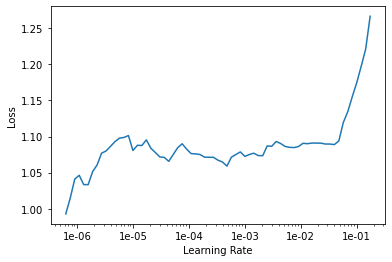

In [25]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.100998,1.183218,0.557883,02:34
1,1.208334,1.602014,0.430088,02:34
2,1.199424,1.353779,0.503255,02:34
3,1.164015,1.295159,0.496179,02:34
4,1.068055,1.411070,0.471412,02:34


Better model found at epoch 0 with accuracy value: 0.5578828454017639.


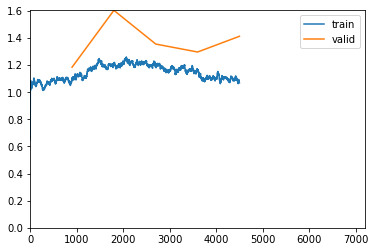

KeyboardInterrupt: 

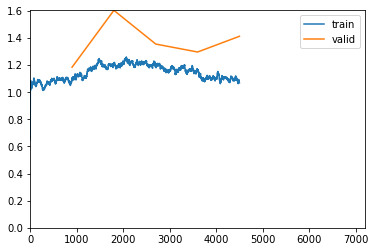

In [24]:
learn.fit_one_cycle(8, max_lr=slice(1e-2) ,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best'), ShowGraph(learn)])

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


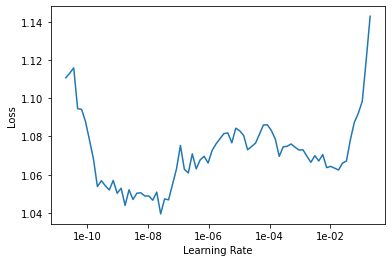

In [32]:
learn.lr_find(start_lr=1e-12)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.053065,1.118682,0.573450,02:34
1,1.071134,1.102388,0.583498,02:34
2,1.007608,1.097015,0.586046,02:34
3,1.037235,1.095565,0.589301,02:34
4,0.996844,1.094555,0.590575,02:34
5,0.995626,1.093403,0.593264,02:34
6,1.013876,1.093569,0.592414,02:35
7,1.006242,1.092776,0.592556,02:35


Better model found at epoch 0 with accuracy value: 0.5734503269195557.


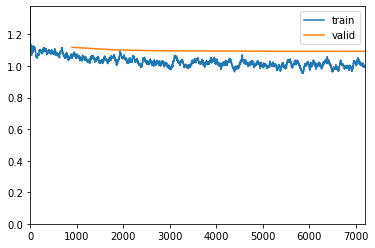

Better model found at epoch 1 with accuracy value: 0.5834984183311462.
Better model found at epoch 2 with accuracy value: 0.5860458612442017.
Better model found at epoch 3 with accuracy value: 0.5893008708953857.
Better model found at epoch 4 with accuracy value: 0.5905745625495911.
Better model found at epoch 5 with accuracy value: 0.5932635068893433.


In [33]:
learn.fit_one_cycle(8, max_lr=slice(1e-4) ,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best'), ShowGraph(learn)])

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


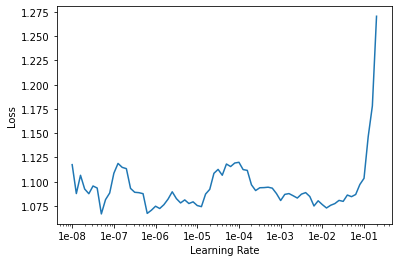

In [34]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.013542,1.098590,0.589159,02:34
1,1.002306,1.107661,0.583781,02:34
2,1.012498,1.113648,0.584631,02:35
3,1.004047,1.115626,0.586753,02:35
4,0.960463,1.078826,0.599066,02:35
5,0.895162,1.089116,0.598641,02:35
6,0.871095,1.091091,0.602746,02:35
7,0.894350,1.093736,0.603595,02:35


Better model found at epoch 0 with accuracy value: 0.589159369468689.


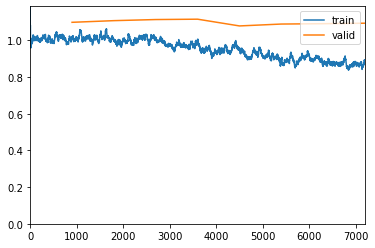

Better model found at epoch 4 with accuracy value: 0.5990659594535828.
Better model found at epoch 6 with accuracy value: 0.602745532989502.
Better model found at epoch 7 with accuracy value: 0.6035946607589722.


In [38]:
learn.fit_one_cycle(8, max_lr=(1e-3) ,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best'), ShowGraph(learn)])

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


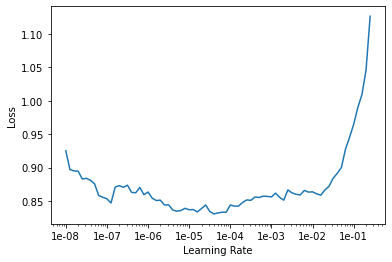

In [39]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

In [40]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


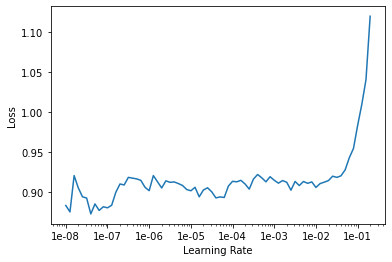

In [43]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.936040,1.151856,0.582083,02:34
1,1.105396,1.328241,0.508067,02:34
2,1.186204,1.408017,0.468723,02:34


Better model found at epoch 0 with accuracy value: 0.5820832252502441.


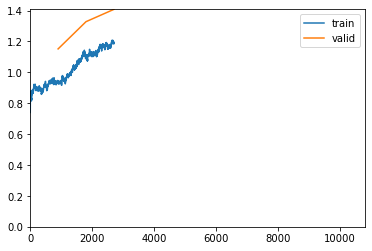

KeyboardInterrupt: 

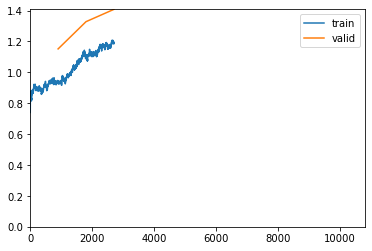

In [42]:
learn.fit_one_cycle(12, max_lr=1e-2 ,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best'), ShowGraph(learn)])

In [44]:
learn

ZeroDivisionError: division by zero

In [46]:
learn = learn.load('best')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


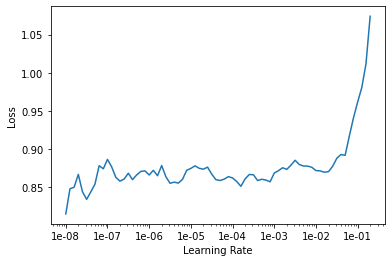

In [47]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.895539,1.094307,0.603595,02:34
1,0.895064,1.097188,0.603736,02:35
2,0.900018,1.096616,0.604161,02:35
3,0.881993,1.103333,0.599207,02:35
4,0.879856,1.101512,0.602038,02:35
5,0.891995,1.103567,0.602604,02:35
6,0.844480,1.107486,0.601472,02:35
7,0.835617,1.106506,0.601896,02:35
8,0.884337,1.107247,0.603736,02:35
9,0.856812,1.107936,0.603312,02:35


Better model found at epoch 0 with accuracy value: 0.6035946607589722.


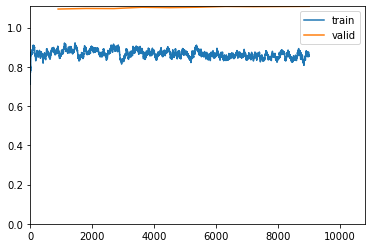

Better model found at epoch 1 with accuracy value: 0.6037362217903137.
Better model found at epoch 2 with accuracy value: 0.6041607856750488.


In [ ]:
learn.fit_one_cycle(12, max_lr=1e-4 ,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best'), ShowGraph(learn)])